### **Exploratory Data Analysis**

This dataset includes customer usage data and churn information from a commpany that likely a telecom service provider. 

The goal is to reveal insights about the factors driving customer churn and building the predictive model that identifies at-risk customers. This enables business to focus their retention strategies more effectively on those most likely to leave.

#### **0. Imports and reading data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix

In [2]:
train = pd.read_csv('churn-bigml-80.csv')
test = pd.read_csv('churn-bigml-20.csv')

#### **1. Data Understanding**

In [3]:
# Dataset shape with total number of rows and columns
train.shape, test.shape

((2666, 20), (667, 20))

In [4]:
# Small sample of the dataset
train.sample(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2210,VA,21,415,No,No,0,223.2,142,37.94,216.5,114,18.40,214.7,111,9.66,12.4,2,3.35,1,False
1940,NY,77,415,No,Yes,33,143.0,101,24.31,212.2,102,18.04,104.9,120,4.72,15.3,4,4.13,5,True
1020,IA,46,510,No,No,0,199.2,111,33.86,175.1,83,14.88,210.6,84,9.48,10.2,2,2.75,3,False
1033,NH,124,415,No,No,0,254.3,113,43.23,78.9,104,6.71,153.2,69,6.89,11.8,2,3.19,2,False
1587,WY,160,408,No,No,0,82.7,116,14.06,194.6,95,16.54,159.0,54,7.15,10.9,9,2.94,0,False
1434,CO,156,408,Yes,No,0,277.0,119,47.09,238.3,106,20.26,94.4,96,4.25,8.3,3,2.24,1,False
475,ME,82,510,No,Yes,29,207.2,111,35.22,254.1,137,21.60,169.3,92,7.62,9.5,5,2.57,2,False
1662,AK,52,510,No,No,0,148.3,83,25.21,181.6,79,15.44,155.6,104,7.00,8.3,6,2.24,3,False
137,GA,185,510,No,Yes,31,189.8,126,32.27,163.3,133,13.88,264.8,126,11.92,7.5,3,2.03,1,False
2622,OK,134,415,No,No,0,164.9,115,28.03,126.5,96,10.75,238.5,125,10.73,10.0,9,2.70,2,False


In [5]:
# Overview of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [6]:
# Checking null from dataset
train.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [7]:
# Checking for duplicate, result show only 'False' so there is no duplicate in the train and test dataset
train.duplicated().unique(), test.duplicated().unique()

(array([False]), array([False]))

In [8]:
# More detail about the dataset
train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
# Display the number of unique values in each column
for col in train.columns.to_list():
    print(f'{col} : {train[col].nunique()}')

State : 51
Account length : 205
Area code : 3
International plan : 2
Voice mail plan : 2
Number vmail messages : 42
Total day minutes : 1489
Total day calls : 115
Total day charge : 1489
Total eve minutes : 1442
Total eve calls : 120
Total eve charge : 1301
Total night minutes : 1444
Total night calls : 118
Total night charge : 885
Total intl minutes : 158
Total intl calls : 21
Total intl charge : 158
Customer service calls : 10
Churn : 2


#### **2.Feature Understanding**

##### **2.1 Data Distribution**

Visualize data distributions is an important step, as it provides a clear overview of the dataset's structure and characteristics.

According to the chart, most of the features have the normal distribution. This is good for building predictive models, especially Regression/Linear. 

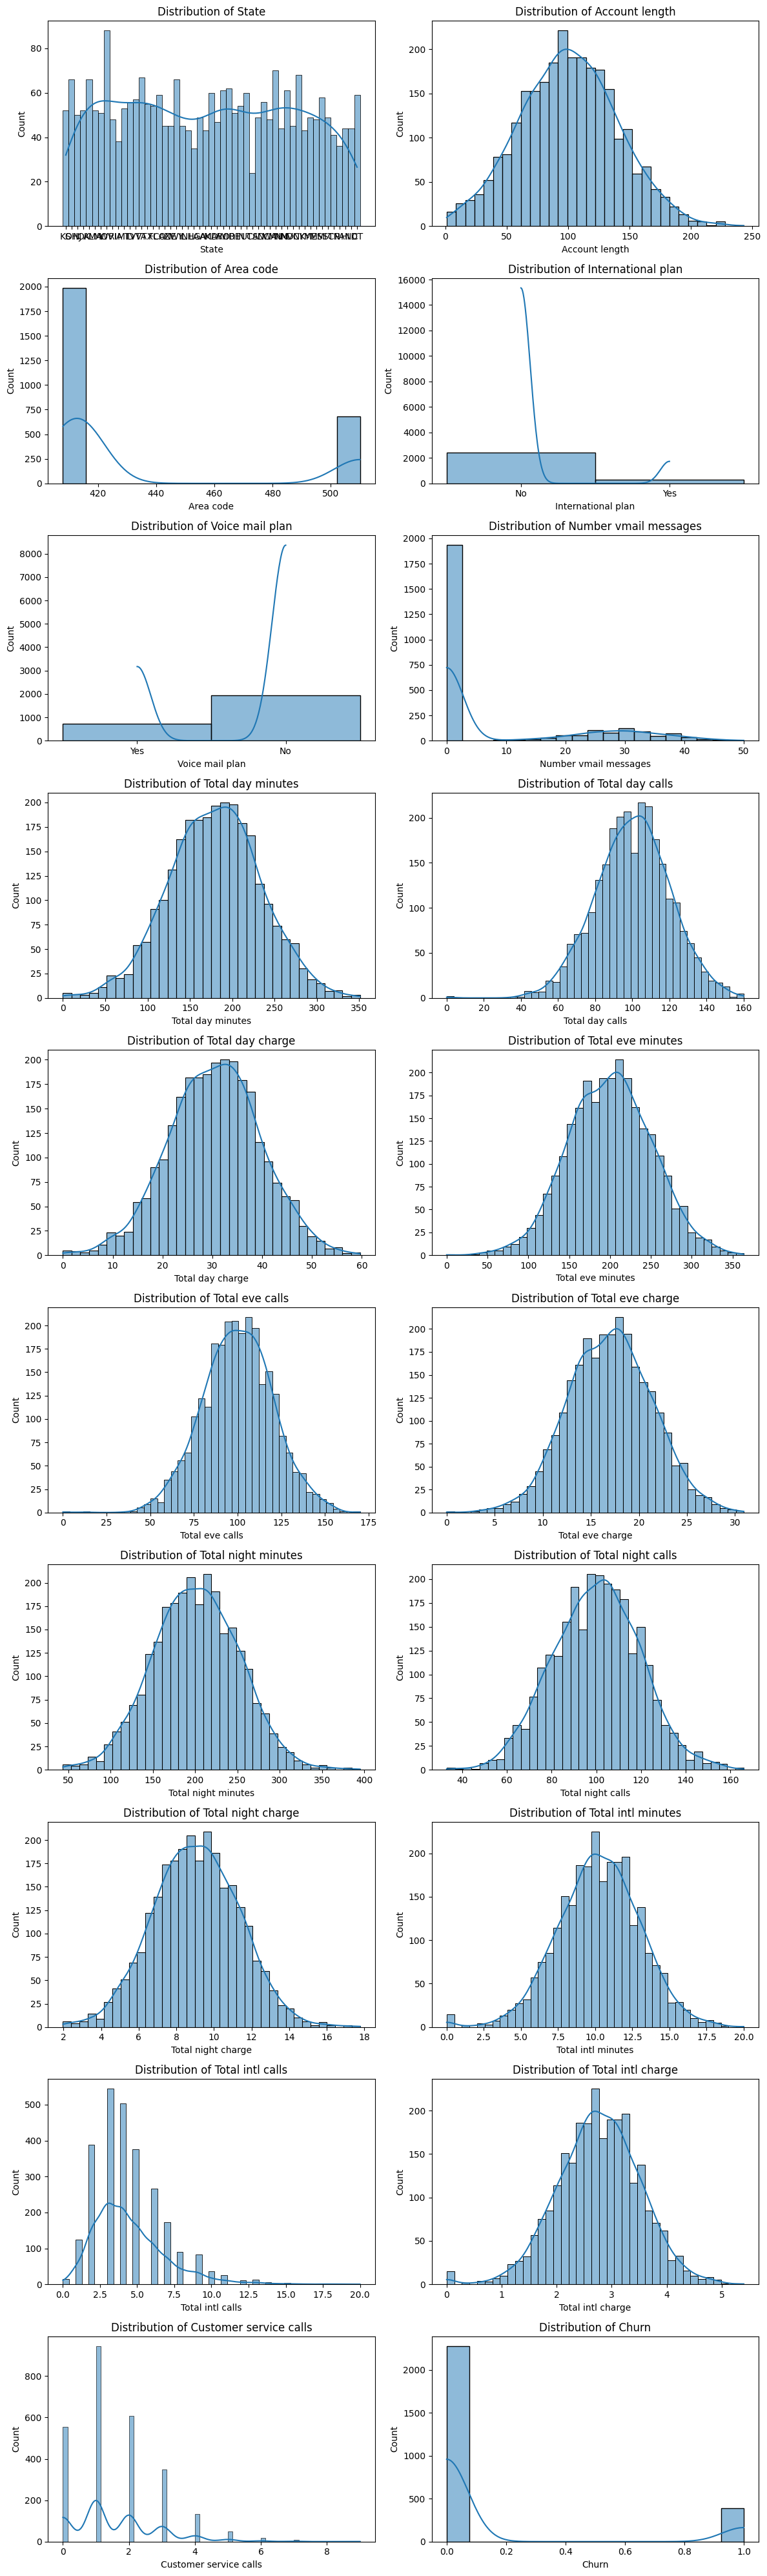

In [10]:
col_list = train.columns.to_list()
cols_len = len(col_list)

n_cols = 2
n_rows = math.ceil(cols_len / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(col_list):
    sns.histplot(data=train, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Now, the features are splitted into 2 groups based on the number of unique values: 

- Numerical (nunique > 20 )
- Categorical (nunique < 20)

This is neccessary for data preprocessing steps, as the numerical will be normalized while categorical will be decoded.

In [11]:
Numerical = [
    'Account length',
    'Number vmail messages',
    'Total day minutes',
    'Total day calls',
    'Total day charge',
    'Total eve minutes',
    'Total eve calls',
    'Total eve charge',
    'Total night minutes',
    'Total night calls',
    'Total night charge',
    'Total intl minutes',
    'Total intl calls',
    'Total intl charge'
]

Categorical = [
    'State', 
    'Area code',
    'International plan',
    'Voice mail plan',
    'Customer service calls'
]

##### **2.2 Correlation Matrix**

In [12]:
# Funtion for Correlation matrix
def heatmap(df, title):
    CM = df.corr()
    np.fill_diagonal(CM.values, 0)

    threshold = 0.05

    mask = np.abs(CM) <= threshold
    # Create a heatmap for the lower triangle
    plt.figure(figsize=(10, 6))
    sns.heatmap(CM, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
    plt.title(title)
    plt.show()

To understand the relationship between features, we visualize the correlation matrix with our desired columns.

According to the chart:

- There are some columns that have an impact on **'Churn'**: 'Number vmail messages', Total minutes columns, Total charge columns, 'Total intl calls' and 'Customer service calls'.

- Besides that, it is obviously to have high correlation between minutes usage and charge (The more minutes usage, the higher of charge).

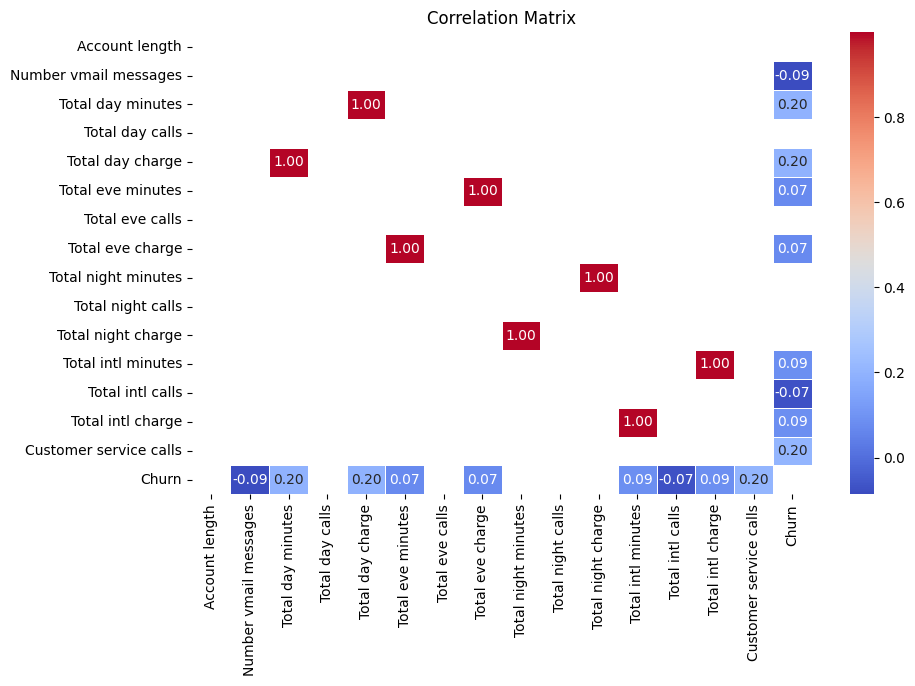

In [13]:
# Target columns
cols = Numerical.copy()
cols.extend(['Customer service calls', 'Churn'])

heatmap(train[cols], 'Correlation Matrix')

##### **2.3 Numerical Data**

From the visualization, churned customers show slightly higher average in most of features, except Number vmail messages and Total intl calls. This can be explain that churned customers tend to use the services more extensively, leading to the charges is too high for them.

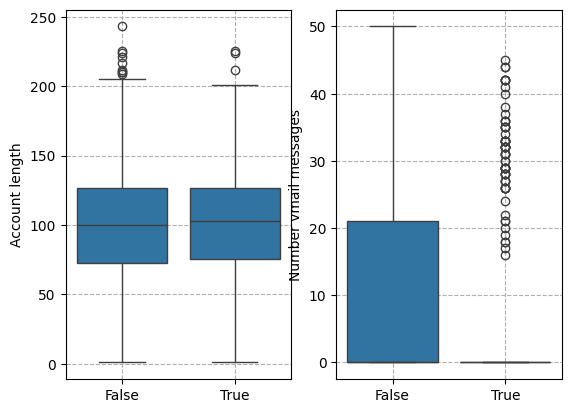

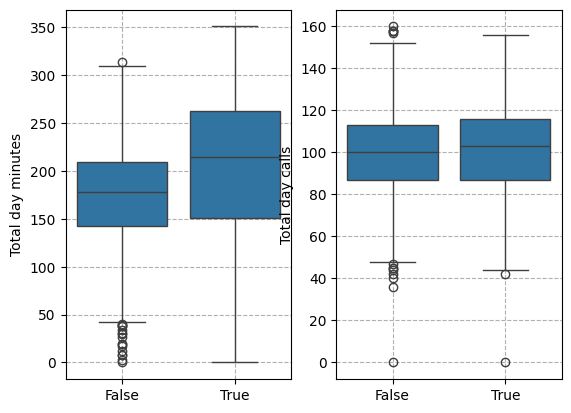

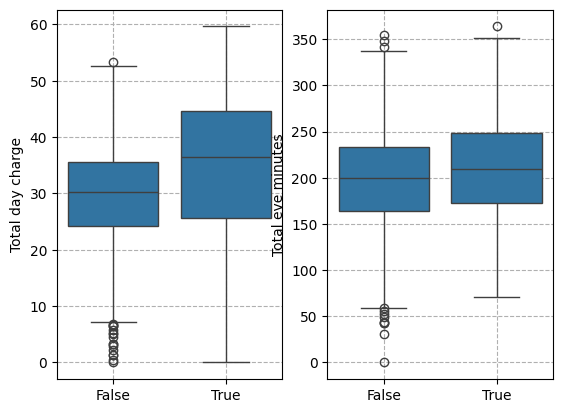

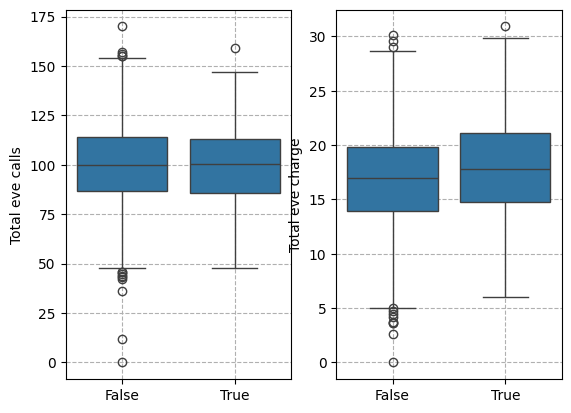

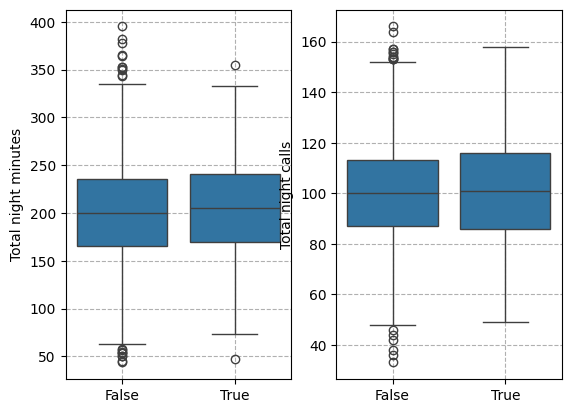

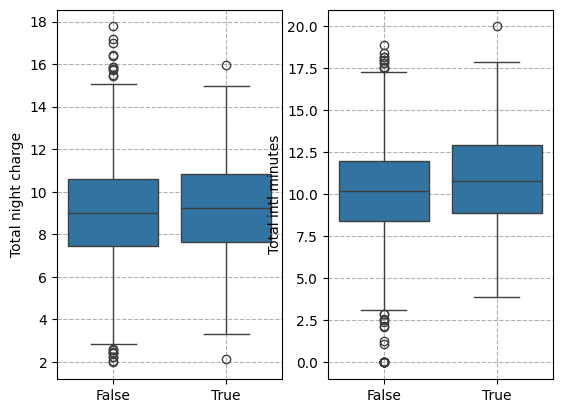

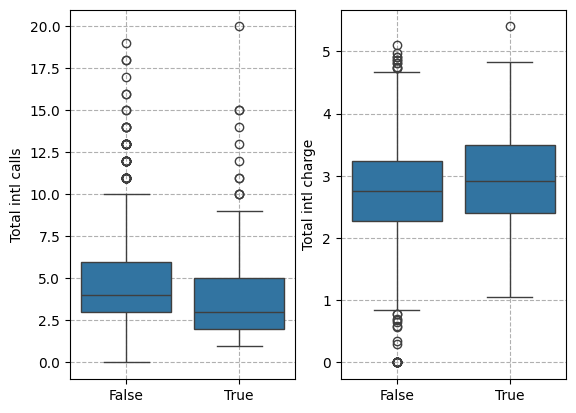

In [14]:
for i in range(0,len(Numerical),2):
    fig,ax = plt.subplots(1,2)
    sns.boxplot(train,y = Numerical[i], x = "Churn",ax=ax[0])
    sns.boxplot(train,y = Numerical[i+1], x = "Churn",ax=ax[1])
    for ax in ax:
        ax.grid(True, which='both', linestyle='--')
        ax.set(xlabel='')

##### **2.4 Categorical Data**

In [15]:
# Helper function to visualize pie chart for selected categorical data
def pie_visual(df, category):
    
    # Make a summary df for each category
    summary_df = df.groupby([category, 'Churn']).size().reset_index(name='Count')

    unique_cate = df[category].unique()
    n = len(unique_cate)

    fig, ax = plt.subplots(1, n, figsize=(4 * n, 4))

    # Pie plot
    for i, cate in enumerate(unique_cate):
        counts = summary_df[(summary_df[category] == cate)]['Count'].values
        labels = summary_df[(summary_df[category] == cate)]['Churn'].values
        ax[i].pie(
            counts,
            labels=labels,
            autopct='%1.1f%%',
            startangle=-90
        )
        ax[i].set_title(f'{category} - {cate}')
        ax[i].axis('equal')

    plt.tight_layout()
    plt.show()


The chart provides a more detailed breakdown of the churn proportion across different categories:

- **'Area code'** : The Churn rate is quite similar between area codes. This shows that the Area code do not have any impact on the churn decision.

- **'International plan'**: Only **11.3%** of customer without 'International plan' choose to leave. However, the churn rate is up to **43.7%** with customer with 'International plan'. This means that **'International plan'** have a strong correlation with the target **'Churn'**.

- **'Voice mail plan'**: Customer with 'Voice mail plan' churn rate is **8.9%**, compared to **16.7%** for those without 'Voice mail plan'. This suggests that having a voice mail plan may be associated with higher customer retention.

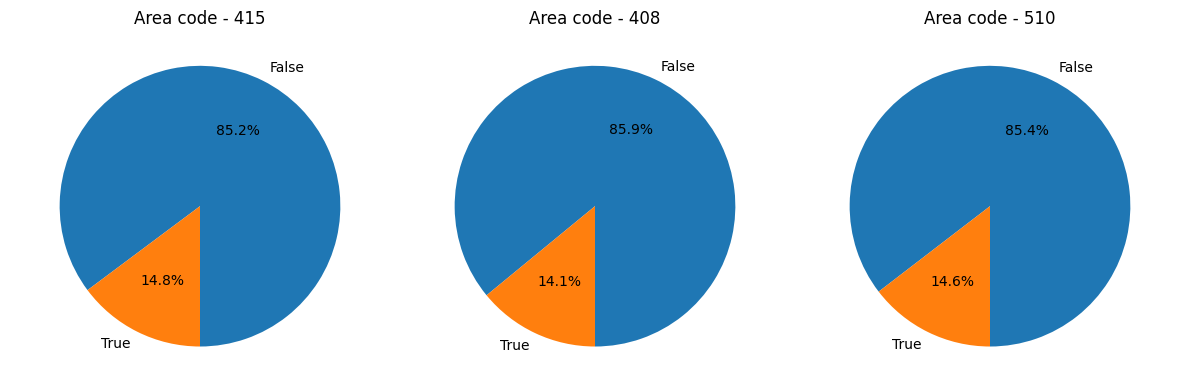

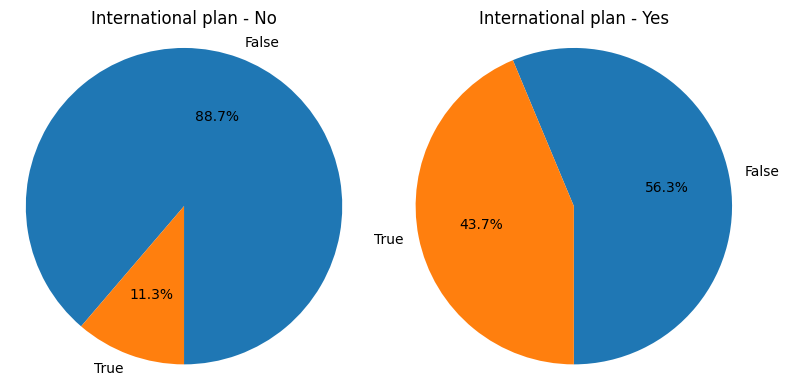

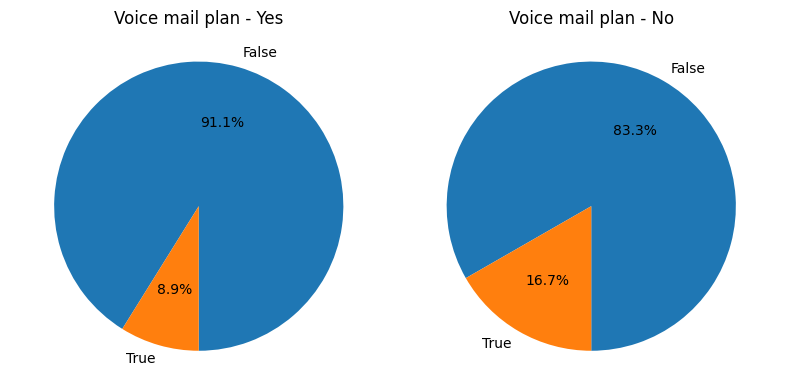

In [16]:
Cate_list = [
    'Area code',
    'International plan',
    'Voice mail plan'
]

for c in Cate_list:
    pie_visual(train, c)

##### **2.3 Target Distribution**

<Axes: xlabel='Churn', ylabel='count'>

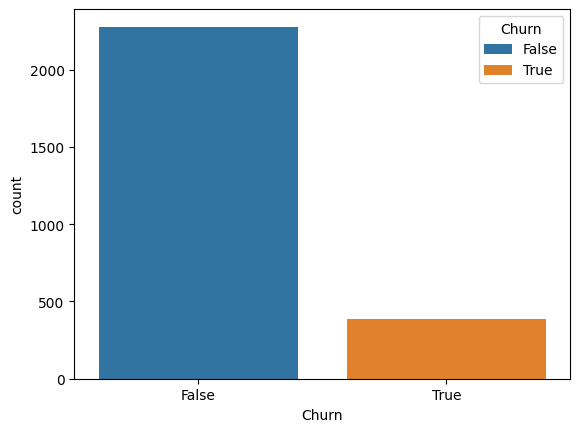

In [17]:
sns.countplot(train, x='Churn', hue='Churn')

<Axes: xlabel='Churn', ylabel='count'>

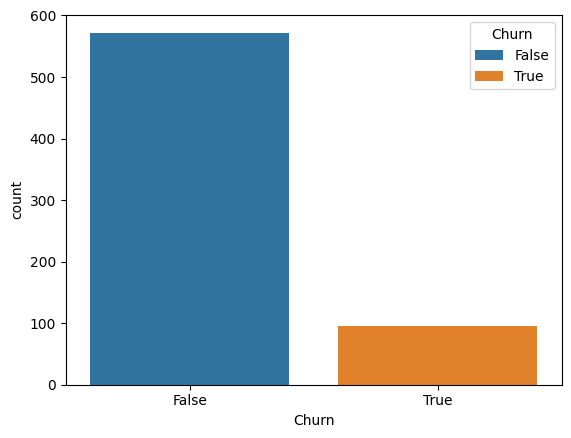

In [24]:
sns.countplot(test, x='Churn', hue='Churn')

In [18]:
# Checking label distribution in train and test dataset
trainTrueVal = train['Churn'].value_counts().loc[True]
testTrueVal = test['Churn'].value_counts().loc[True]

trainTrueRate = (trainTrueVal / train.shape[0]) * 100
testTrueRate = (testTrueVal / test.shape[0]) * 100

print(f'Proportion of True values in Train dataset: {round(trainTrueRate, 2)}%')
print(f'Proportion of True values in Test dataset: {round(testTrueRate, 2)}%')

Proportion of True values in Train dataset: 14.55%
Proportion of True values in Test dataset: 14.24%


This is a good result because train dataset and test dataset are well-aligned which we can proceed to building predictive models.

#### **3. Data Prepocessing**

##### **3.1 Encode and Scale function**

From the results in Data Understanding, now we can make a new dataframe that exlude unneccessary columns : 'Area code', 'Total day charge', 'Total eve charge', 'Total night charge', and 'Total inlt charge'.

In [19]:
# Helper function to Label Encode categorical columns and scale numerical columns
def Encode_and_Scale(df, is_train=True, scaler=None, label_encoders=None):
    col_to_drop = ['Area code', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']
    cols_exist = [col for col in col_to_drop if col in df.columns]
    df = df.drop(columns=cols_exist)

    #Scale numerical columns
    numerical_cols = df.select_dtypes(include='number').columns.tolist()
    if 'Customer service calls' in numerical_cols:
        numerical_cols.remove('Customer service calls') #This belong to categorical data

    if is_train:
        scaler = StandardScaler()
        df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    else:
        df[numerical_cols] = scaler.transform(df[numerical_cols])

    #Mapping categorical columns with binary variables
    binary_maps = {
        'International plan': {'Yes': 1, 'No': 0},
        'Voice mail plan': {'Yes': 1, 'No': 0},
    }
    for col, mapping in binary_maps.items():
        if col in df.columns:
            df[col] = df[col].map(mapping)

    if label_encoders is None:
        label_encoders = {}

    #Label encode other categorical columns
    for col in ['State', 'Customer service calls']:
        if col in df.columns:
            if is_train:
                le = LabelEncoder()
                df[col] = le.fit_transform(df[col])
                label_encoders[col] = le
            else:
                le = label_encoders.get(col)
                if le:
                    df[col] = le.transform(df[col])

    return df, scaler, label_encoders

##### **3.2 Modeling**

In [25]:
#Split train dataset into train and validate data
X = train.drop(columns=['Churn'])
y = train['Churn']

X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Checking label distribution in train and validate dataset
trainTrueVal = y_train.value_counts().loc[True]
validateTrueVal = y_validate.value_counts().loc[True]

trainTrueRate = (trainTrueVal / y_train.shape[0]) * 100
validateTrueRate = (validateTrueVal / y_validate.shape[0]) * 100

print(f'Train dataset shape: {X_train.shape[0]}')
print(f'Validate dataset shape: {X_validate.shape[0]}')
print(f'Proportion of True values in Train dataset: {round(trainTrueRate, 2)}%')
print(f'Proportion of True values in Validate dataset: {round(validateTrueRate, 2)}%')

Train dataset shape: 2132
Validate dataset shape: 534
Proportion of True values in Train dataset: 14.54%
Proportion of True values in Validate dataset: 14.61%


In [26]:
#Encode label df
y_train = y_train.map({'True': 1, 'False': 0, True: 1, False: 0})
y_validate = y_validate.map({'True': 1, 'False': 0, True: 1, False: 0})

#Scale data
X_train_scaled, scaler, encoders = Encode_and_Scale(X_train, is_train=True)
X_validate_scaled, _, _ = Encode_and_Scale(X_validate, is_train=False, scaler=scaler, label_encoders=encoders)

#Classification models
models = [LogisticRegression(random_state=42, solver='liblinear'),
          DecisionTreeClassifier(random_state=42),
          RandomForestClassifier(random_state=42),
          KNeighborsClassifier(),
          GaussianNB(),
          LGBMClassifier(random_state=42),
          XGBClassifier(random_state=42)
          ]

res = {}
#Apply models
for model in models:
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_validate_scaled)
    y_pred_proba = model.predict_proba(X_validate_scaled)

    #Prediction error metrics
    recall = metrics.recall_score(y_validate, y_pred)
    f1 = metrics.f1_score(y_validate, y_pred)
    auc = metrics.roc_auc_score(y_validate, y_pred)
    logloss = metrics.log_loss(y_validate, y_pred_proba)

    # Record results
    name = model.__class__.__name__
    res[f'{name}'] = {'Model': name,
                      'Recall': recall,
                      'F1': f1,
                      'AUC': auc,
                      'Logloss': logloss
                      }

# Plot results
res = pd.DataFrame.from_dict(res).T.reset_index(drop=True)
res_table = (res.groupby('Model')
            .mean()
            .style
            .highlight_max(color='#0013de', subset=['Recall', 'F1', 'AUC']) # higher is better --> highlight_max
            .highlight_min(color='#0013de', subset=['Logloss']) # lower is better --> highlight_min
            .format(precision=2)
            )
res_table

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 310, number of negative: 1822
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1511
[LightGBM] [Info] Number of data points in the train set: 2132, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.145403 -> initscore=-1.771118
[LightGBM] [Info] Start training from score -1.771118


,Recall,F1,AUC,Logloss
Model,,,,
DecisionTreeClassifier,0.65,0.65,0.80,3.78
GaussianNB,0.37,0.39,0.64,0.55
KNeighborsClassifier,0.13,0.22,0.56,2.15
LGBMClassifier,0.73,0.83,0.86,0.25
LogisticRegression,0.17,0.23,0.56,0.37
RandomForestClassifier,0.62,0.76,0.81,0.41
XGBClassifier,0.73,0.82,0.86,0.25


- Recall: Proportion of actual values that correctly identifiers

$$
\text{Recall} = \frac{True Positives}{True Positives + False Negatives}
$$

- F1 Score: Balance measure of precision and recall

$$
\text{F1} = \frac{Precision * Recall}{Precision + Recall}
$$

- AUC: How well model distinguishes between classes across thresholds

$$
\text{Range: 0.5 (No discrimination) to 1.0 (Perfect discrimination)}
$$


- Logloss: How close the predicted probabilities are to the actual labels

$$
\text{Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$


##### **3.3 Feature Importance**

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 388, number of negative: 2278
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1537
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.145536 -> initscore=-1.770048
[LightGBM] [Info] Start training from score -1.770048


F:\Temp\ipykernel_18160\1705485072.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


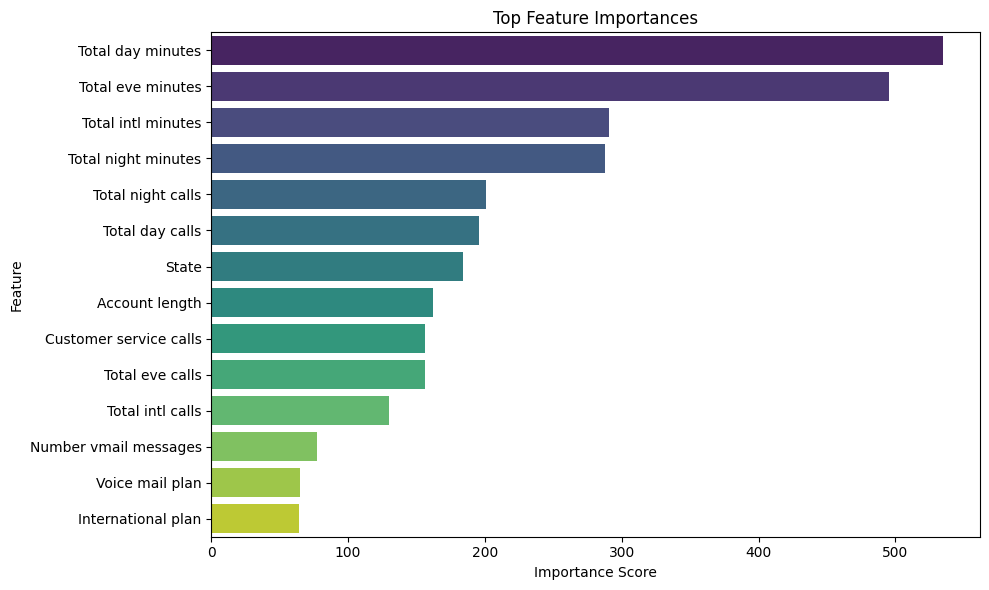

In [27]:
#Apply best model to train data

#Scale data and encode
X_prepared, scaler, encoders = Encode_and_Scale(X, is_train=True)
y_prepared = y.map({'True': 1, 'False': 0, True: 1, False: 0})

#Fit model
clf = LGBMClassifier(random_state=42)
clf.fit(X_prepared, y_prepared)

#Feature importance
importances = clf.feature_importances_

# Sort features
feature_imp_df = pd.DataFrame({
    'Feature': X_prepared.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Top Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


##### **3.4 Final Result**

In [28]:
#Apply to test dataset
X_test = test.drop(columns=['Churn'])
y_test = test['Churn']

#Scale data and encode
X_, _, _ = Encode_and_Scale(X_test, is_train=False, scaler=scaler, label_encoders=encoders)
y_ = y_test.map({'True': 1, 'False': 0, True: 1, False: 0})

#Prediction
y_test_pred = clf.predict(X_)

#Result
res = metrics.recall_score(y_, y_test_pred)
print(f'Recall score: {round(res, 2)}')

Recall score: 0.78


#### **4. Conclusion**

**1. What is the significance of Churn Rate for stakeholders (Customers, MCI, etc.)?**

- Churn rate is the percentage of customers who choose to stop using the service over the given period. An increase in churn rate typically indicates customer dissatisfaction. There are many reasons behind this, maybe high service charge or poor service quality. 

- For stakeholders, finding new customers always more challenging and resource-intensive than retaining the current customers (Marketing, run the campaign, etc).

**2. What are the characteristics of each Type of Customer (Churn or Not Churn)?**

- Based on the results in **Numerical Data** and **Categorical Data**, there are some characteristics of Churned customers: 

- **Day-time usage**: The chart show that there is a significant gap between Churned and Non-churn customers in 'Total day minutes'. This means that Churned customers tend to use the service more during day time (daily work, customer service office, etc), leading to high charge which may contribute to dissatisfaction and churn.

- **Internation plan**: There is a huge amount of customers with 'International plan' choose to leave than without. Maybe the reason is that the user experienced the bad connection during the call or the charge is over their expectation.

- **Voice mail plan**: In contrast, the proportion of churned customers who without 'Voice mail plan'is more than who have the plan.

**3. Which ML modeling can be implemented and represent model results? including features input and explaining features important.**

- LGBMClassifier is the best model where:
    - Recall : 0.73
    - F1     : 0.83	
    - AUC    : 0.86	
    - Logloss: 0.25

- There are 5 columns being dropped 'Area code', 'Total day charge', 'Total eve charge', 'Total night charge' and 'Total inlt charge'

- Top features of feature importances are total minutes usage in different day time. This is reasonabale because high usage come up with costly charge may lead to churn.

**4. What actions regarding qualitative and quantitative analytics could be implemented to enhance retention rate?** 

- Qualitative:

    - Offer the benefits or discounts to royal customers.

    - More subscription options for customers with high usage demand in specific time/field (Daytime or International)

    - Improve service quality to reduce customer service calls

- Quantitive:

    - Apply predictive model to detect at-risk customers

    - Improve the quality of customer service (Training plan for customer service employees)

#### **5 Old Version**

This is the old version I made, in this version:

- Apply Encode_and_Scale function to train and test dataset.
- Apply 4 models (Logistic Regression, Decision Tree, Random Forest, Gradient Boosting) with configured parameters.

In [19]:
prepared_train, scaler, encoders = Encode_and_Scale(train, is_train=True)
prepared_test, _, _= Encode_and_Scale(test, is_train=False, scaler=scaler, label_encoders=encoders)

y_train = prepared_train['Churn']
X_train = prepared_train.drop(columns=['Churn'])
y_test = prepared_test['Churn']
X_test = prepared_test.drop(columns=['Churn'])

In [20]:
def apply_ML(model, X_train, y_train, X_test, y_test):
    clf = model
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    cm = confusion_matrix(y_test, y_pred)

    # Printing the results
    print("Accuracy: ", accuracy)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.show()

    

##### **5.1 Logistic Regression**

Accuracy:  85.45727136431785


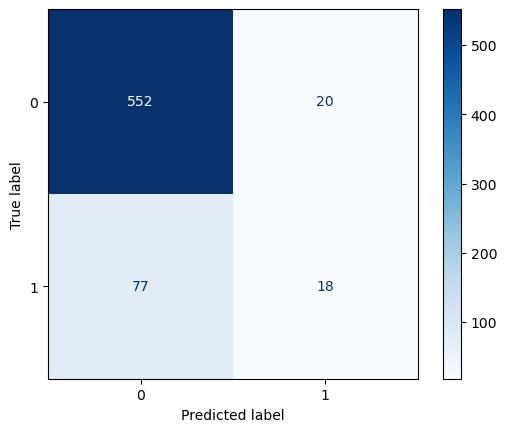

In [52]:
apply_ML(LogisticRegression(max_iter=1000), X_train, y_train, X_test, y_test)

##### **5.2 Decision Tree**

Accuracy:  95.05247376311844


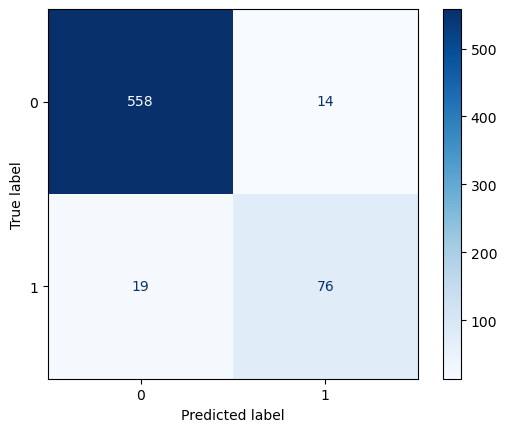

In [66]:
apply_ML(DecisionTreeClassifier(max_depth=5, random_state=42), X_train, y_train, X_test, y_test)

##### **5.3 Random Forest**

Accuracy:  94.00299850074963


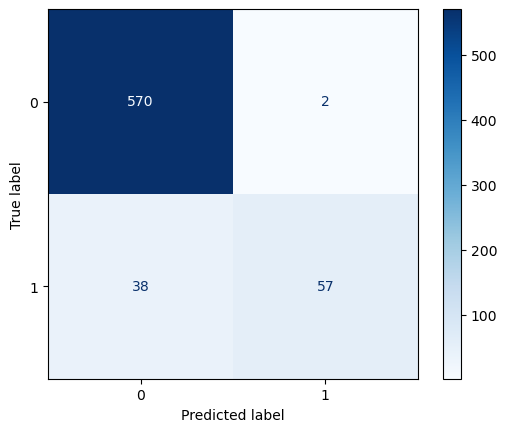

In [64]:
apply_ML(RandomForestClassifier(n_estimators=100, random_state=0), X_train, y_train, X_test, y_test)

##### **5.4 Gradient Boosting**

Accuracy:  93.7031484257871


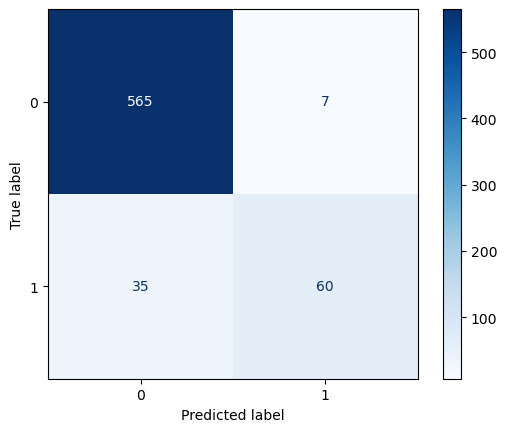

In [62]:
apply_ML(GradientBoostingClassifier(n_estimators=100, max_depth=2, random_state=0), X_train, y_train, X_test, y_test)

##### **5.5 Feature Importances**

According the result from each model, Decision Tree are the best model, followed by Random Forest, Gradient Boosting, and Logistic Regression. However, the model (accuracy 95%) might be an overfitting as our target is imbalance. We can look into this further later.

Now, let visualize the Feature Importances of the best model (Decision Tree).

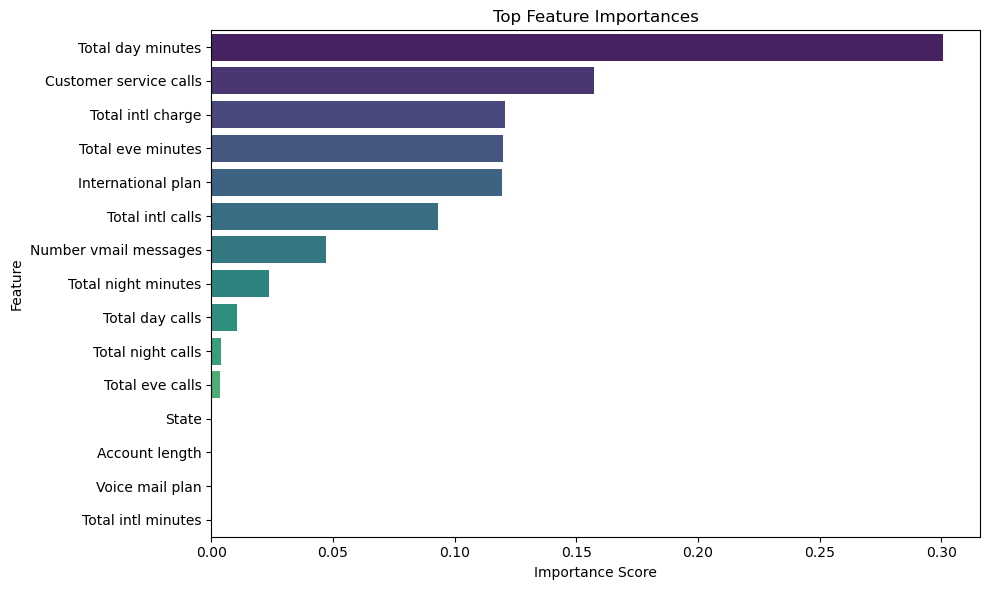

In [ ]:
# Train the model
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)

importances = clf.feature_importances_

# Sort features
feature_imp_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Top Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
